# Lab Report 1 by Aaron Standefer

We care about the Origin of Replication (Ori) and the DnaA box because they show where a cell starts its replication process. This is also where the highest likelyhood of deanimation will occur.  My approach was to use some of the functions we created in class, such as `skew` and `freqwords`.  Using these two functions, plus the functions required to power them, I was able to cut down to a small part of the whole Salmonella genome and find the 9-mers with a `d` of 1.  In the end, I got a short list of results of
['CCCGGATCC', 'GGATCCGGG', 'CGGATCCGG', 'CCGGATCCG', 'GGATCCTGG', 'CCAGGATCC'].

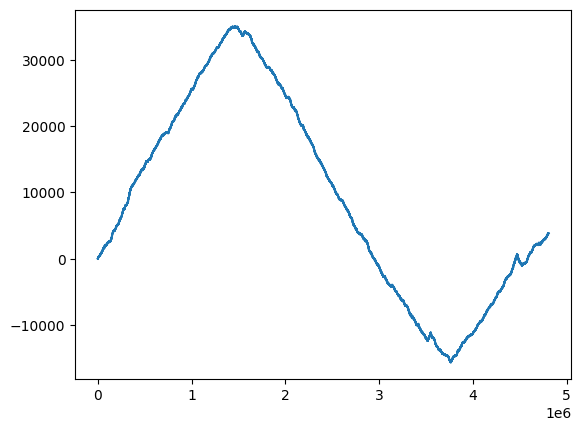

['CCCGGATCC', 'GGATCCGGG', 'CGGATCCGG', 'CCGGATCCG', 'GGATCCTGG', 'CCAGGATCC']


In [2]:
from Day2_Lab import *
import matplotlib.pyplot as plt

def skew(text):
    sCountList = []
    sCount = 0
    length = len(text)
    for i in range(length):
        if text[i] == 'C':
            sCount -= 1
        elif text[i] == 'G':
            sCount += 1
        sCountList.append(sCount)
    return sCountList

def minimizeSkew(text):
    minimum = 0
    locations = []
    count = 1
    for i in skew(text):
        if i < minimum:
            minimum = i
            locations = [count]
        elif i==minimum:
            locations.append(count)
        count+=1
    return locations

def neighbors(pattern, d):
    nucTides = {'A','C','G','T'}
    if d==0:
        return {pattern}
    if len(pattern)==1:
        return nucTides
    progNeighbors = neighbors(pattern[1:], d)
    
    bors = set()
    for i in progNeighbors:
        if hammingDist(pattern[1:], i) < d:
            bors.update([nuc + i for nuc in nucTides])
        else:
            bors.add(pattern[0] + i)
    
    return bors

def hammingDist(textA, textB):
    dist = 0
    length = len(textA)
    for i in range(length):
        if textA[i] != textB[i]:
            dist+=1
    return dist

def freqWordsWithMisMatchRC(text, k, d):
    
    patterns = []
    freqMap = {}
    n = len(text)
    
    for i in range(n-k+1):
        pattern = text[i:i+k]
        bors = neighbors(pattern, d)
        for j in bors:
            nB = j
            reverseNB = ReverseComplement(j)
            freqMap[nB] = freqMap.get(nB, 0) + 1
            freqMap[reverseNB] = freqMap.get(reverseNB, 0) + 1
    m = MaxMap(freqMap)
    for key in freqMap:
        if freqMap[key] == m:
            patterns.append(key)
    return patterns

if __name__ in "__main__":
    salmonella = open("Salmonella_enterica.txt", 'r').read().split()
    salmonella = "".join(salmonella)

    plt.plot(skew(salmonella))
    plt.show()
    
    shortSalmon = minimizeSkew(salmonella)
    print(freqWordsWithMisMatchRC(salmonella[shortSalmon[0]:shortSalmon[0]+500], 9, 1))
    #['CCCGGATCC', 'GGATCCGGG', 'CGGATCCGG', 'CCGGATCCG', 'GGATCCTGG', 'CCAGGATCC']